# Исследование данных о 3-х комнатных квартирах

Для исследования были собраны объявления с сайта Циан, с использованием самописного парсера. Данные представляют из себя объявления о 3-х комнатных квартирах, во вторичном и многоэтажном жилье, за октябрь 2023 года, в городе Омск. 

Цели:
1. Узнать, топ 10 агенств по продаже квартир. Какое агенство продает больше всего квартир?
2. Сколько в каждом районе продается квартир?
3. Какая средняя площадь квартир и медиана. Какой процент выбросов?
4. На каких этажах продаются квартиры? Укажи 5 самых популярных этажей и количество квартир?
5. Узнать, топ 5 домов по этажности, в которых больше всего продается квартир? Какая самая большая этажность дома?
6. Какая средняя цена и медиана цен? Какой процент выбросов?
7. Какая средняя цена и медиана цен за квадрат? Какой процент выбросов?
8. Изучить взаимосвязь цены и остальных количественных переменных. 

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [345]:
df = pd.read_csv("../data/processed_data_about_apartments.csv", sep=";")
df.head()

,Продавец,Район,Адрес,"Площадь, м2",Этаж,Всего этажей,"Цена, ₽","Цена за квадрат, ₽/м²"
0,Обмен.рф - Брусника Обмен,Кировский,улица Ватутина 24/1,66,7,10,6500000,97305
1,Обмен.рф - Брусника Обмен,Кировский,улица Крупской 12,71,1,10,7700000,108298
2,КВАРТИРНОЕ РЕШЕНИЕ,Советский,улица Лаптева 3,61,1,9,5890000,96557
3,ID 70295415,Октябрьский,улица Свободы 45,62,9,9,4495000,72383
4,ID 79765445,Ленинский,проспект Карла Маркса 40,76,3,10,12311392,161992


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Продавец               1424 non-null   object
 1   Район                  1424 non-null   object
 2   Адрес                  1424 non-null   object
 3   Площадь, м2            1424 non-null   int64 
 4   Этаж                   1424 non-null   int64 
 5   Всего этажей           1424 non-null   int64 
 6   Цена, ₽                1424 non-null   int64 
 7   Цена за квадрат, ₽/м²  1424 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 89.1+ KB


In [347]:
df.describe()

,"Площадь, м2",Этаж,Всего этажей,"Цена, ₽","Цена за квадрат, ₽/м²"
count,1424.000000,1424.000000,1424.000000,1.424000e+03,1424.000000
mean,68.584270,4.339888,7.688202,6.538952e+06,92947.429775
std,16.666795,2.847432,3.305010,2.818690e+06,22088.279005
min,30.000000,1.000000,2.000000,1.600000e+06,35088.000000
25%,59.000000,2.000000,5.000000,4.659750e+06,77500.000000
50%,63.000000,4.000000,9.000000,5.799495e+06,90000.000000
75%,73.000000,6.000000,10.000000,7.505000e+06,104940.500000
max,198.000000,16.000000,24.000000,3.200000e+07,194055.000000


## 1. Узнать, топ 10 агенств по продаже квартир. Какое агенство продает больше всего квартир?

In [348]:
agencies = df["Продавец"].value_counts().head(10)
agencies

Этажи Омск                 114
Самолет Плюс Омск-Центр     80
АВЕСТА-РИЭЛТ                50
Квартсервис                 48
МИАРД ВЛАДИС                37
РИЭЛТКОНСАЛТ                35
ЛИОРА                       30
АССОЛЬ                      20
ТандемТ                     17
НСБ-Недвижимость            15
Name: Продавец, dtype: int64

(0.0, 130.0)

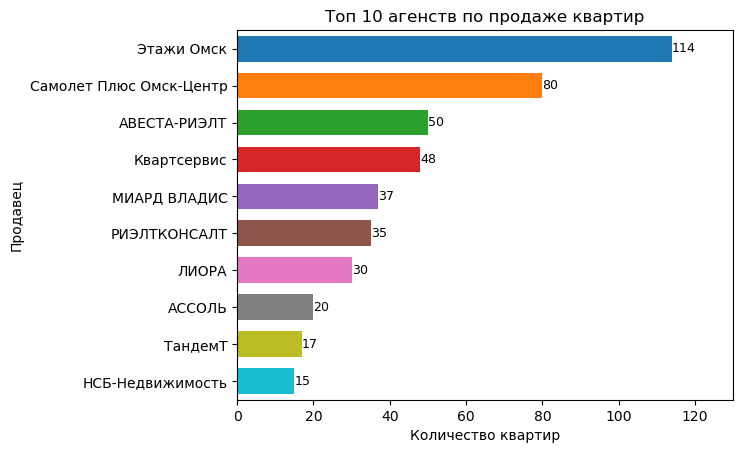

In [349]:
ax = sns.barplot(y=agencies.index, x=agencies.values, saturation=1, width=0.7)
ax.set(xlabel="Количество квартир", ylabel="Продавец", title="Топ 10 агенств по продаже квартир")
ax.bar_label(ax.containers[0], fontsize=9)
ax.set_xlim(right=130)

- Топ 10 агенств:
    1. Этажи Омск - 114 квартир
    2. Самолет Плюс Омск-Центр - 80 квартир
    3. АВЕСТА-РИЭЛТ - 50 квартир
    4. Квартсервис - 48 квартир
    5. МИАРД ВЛАДИС - 37 квартир
    6. РИЭЛТКОНСАЛТ - 35 квартир
    7. ЛИОРА - 30 квартир
    8. АССОЛЬ - 20 квартир
    9. ТандемТ - 17 квартир
    10. НСБ-Недвижимость - 15 квартир
- Как видно на диаграмме, агенство Этажи продает больше всего 3-х комнатных квартир, в городе Омск.

## 2. Сколько в каждом районе продается квартир?

In [350]:
districts = df["Район"].value_counts()
districts

Центральный    420
Кировский      357
Советский      292
Ленинский      178
Октябрьский    177
Name: Район, dtype: int64

[Text(0, 0, '420'),
 Text(0, 0, '357'),
 Text(0, 0, '292'),
 Text(0, 0, '178'),
 Text(0, 0, '177')]

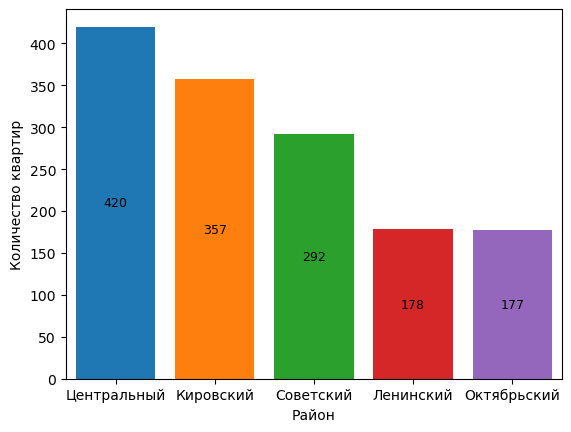

In [352]:
ax = sns.barplot(x=districts.index, y=districts.values, saturation=1)
ax.set(ylabel="Количество квартир", xlabel="Район")
ax.bar_label(ax.containers[0], fontsize=9, label_type="center")

- Центральный район - 420 квартир
- Кировский район - 357 квартир
- Советский район - 292 квартир
- Ленинский район - 178 квартир
- Октябрьский район - 177 квартир

## 3. Какая средняя площадь квартир и медиана. Какой процент выбросов?

In [356]:
square = df["Площадь, м2"]

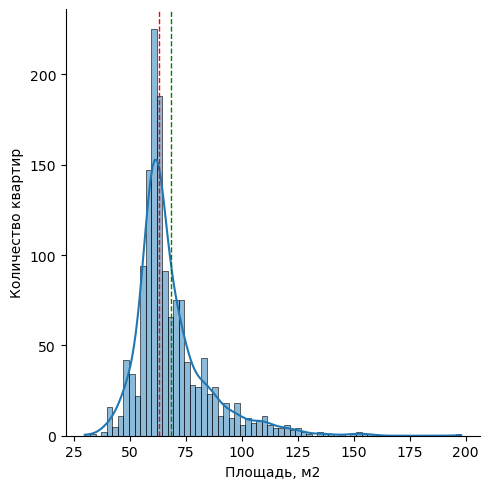

In [357]:
ax = sns.displot(square, kde=True)
ax.set(ylabel="Количество квартир")
plt.axvline(x=square.median(),
            color='red',
            ls='--', 
            lw=1)
plt.axvline(x=square.mean(),
            color='green',
            ls='--', 
            lw=1)

[Text(0.5, 0, 'Площадь, м2')]

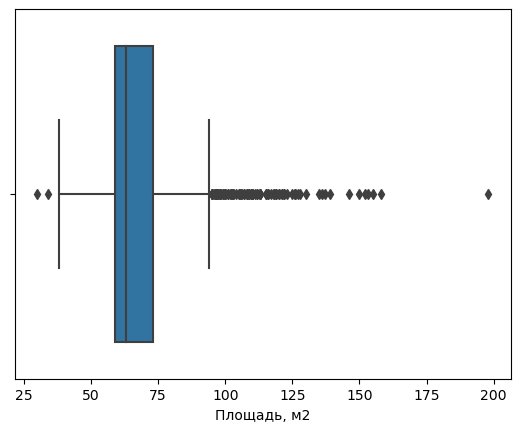

In [358]:
ax = sns.boxplot(x=square.values)
ax.set(xlabel="Площадь, м2")

In [359]:
square.describe()

count    1424.000000
mean       68.584270
std        16.666795
min        30.000000
25%        59.000000
50%        63.000000
75%        73.000000
max       198.000000
Name: Площадь, м2, dtype: float64

In [360]:
# Посчитаем процент выбросов
def quantity_and_percentage_outliers(x: pd.Series) -> str:
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr)

    outliers = x[(x < lower_bound) | (x > upper_bound)]
    percent_outliers = outliers.count() / x.count() * 100
    print(f"Выбросы: {outliers.count()} или {round(percent_outliers)}%.")
    
quantity_and_percentage_outliers(square)

Выбросы: 113 или 8%.


- Средняя площадь 3-х комнатных квартир составляет 68.5 м2, а медиана 63 м2. 
- У 113 квартир или 8%, площадь значительно отличается от площади остальных квартир.

## 4. На каких этажах продаются квартиры? Укажи 5 самых популярных этажей и количество квартир?

In [361]:
floors = df["Этаж"].value_counts()
floors

1     245
5     241
2     218
4     191
3     166
9      86
8      76
6      66
7      61
10     43
12     10
11      8
15      4
14      3
16      3
13      3
Name: Этаж, dtype: int64

(0.0, 280.0)

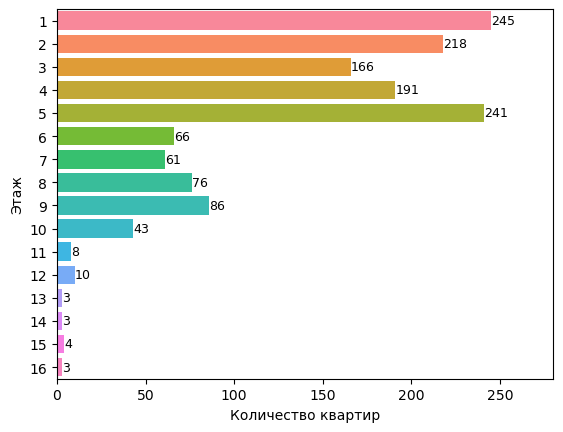

In [362]:
ax = sns.barplot(y=floors.index, x=floors.values, saturation=1,orient="h")
ax.set(xlabel="Количество квартир", ylabel="Этаж")
ax.bar_label(ax.containers[0], fontsize=9)
ax.set_xlim(right=280)

- Квартиры продаются с 1 по 16 этаж.
- Согласно данным, больше всего 3-х комнатных квартир продается на первых 5 этажах.
- Количество квартир:
    - 1 этаж - 245 квартир
    - 2 этаж - 218 квартир 
    - 3 этаж - 166 квартир
    - 4 этаж - 191 квартира
    - 5 этаж - 241 квартира

## 5. Узнать, топ 5 домов по этажности, в которых больше всего продается квартир? Какая самая большая этажность дома?

In [363]:
floors = df["Всего этажей"].value_counts()
floors

5     532
9     344
10    206
12     48
4      45
2      36
16     31
3      31
14     31
6      30
11     23
8      20
17     15
13     13
15      8
7       6
18      2
24      1
19      1
23      1
Name: Всего этажей, dtype: int64

(0.0, 570.0)

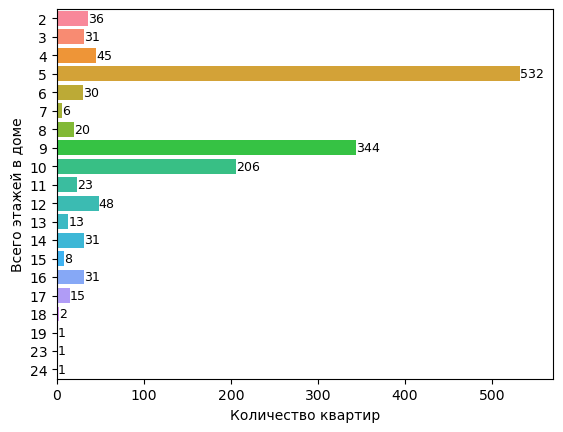

In [364]:
ax = sns.barplot(y=floors.index, x=floors.values, saturation=1,orient="h")
ax.set(xlabel="Количество квартир", ylabel="Всего этажей в доме")
ax.bar_label(ax.containers[0], fontsize=9)
ax.set_xlim(right=570)

- Больше всего квартир продается:
    1. 5 этажный дом - 532 квартиры
    2. 9 этажный дом - 344 квартиры
    3. 10 этажный дом - 206 квартир
    4. 12 этажный дом - 48 квартир
    5. 4 этажный дом - 45 квартир
- Самая большая этажность дома - 24 этажа.

## 6. Какая средняя цена и медиана цен? Какой процент выбросов?

In [365]:
price = df["Цена, ₽"]

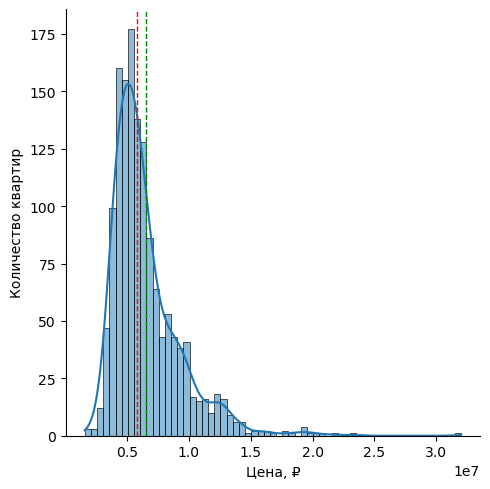

In [366]:
ax = sns.displot(price, kde=True)
ax.set(ylabel="Количество квартир")
plt.axvline(x=price.median(),
            color='red',
            ls='--', 
            lw=1)
plt.axvline(x=price.mean(),
            color='green',
            ls='--', 
            lw=1)

[Text(0.5, 0, 'Цена, ₽')]

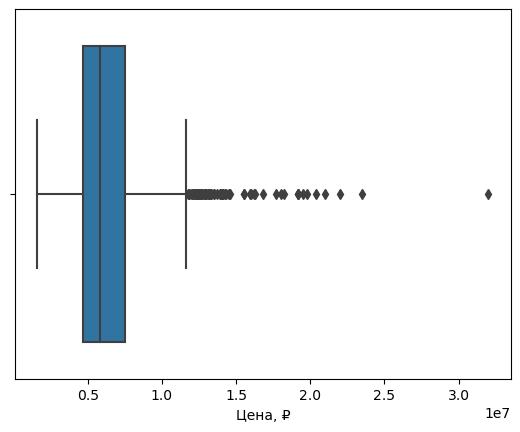

In [367]:
ax = sns.boxplot(x=price)
ax.set(xlabel="Цена, ₽")

In [368]:
price.describe()

count    1.424000e+03
mean     6.538952e+06
std      2.818690e+06
min      1.600000e+06
25%      4.659750e+06
50%      5.799495e+06
75%      7.505000e+06
max      3.200000e+07
Name: Цена, ₽, dtype: float64

In [369]:
# Посчитаем процент выбросов
quantity_and_percentage_outliers(price)

Выбросы: 85 или 6%.


- Средняя цена 3-х комнатных квартир составляет около 6.5 млн. руб., а медиана около 5.8 млн. руб. 
- У 85 квартир или 6%, цена значительно отличается от цены остальных квартир.

## 7. Какая средняя цена и медиана цен за квадрат? Какой процент выбросов?

In [370]:
price_beyond_square = df["Цена за квадрат, ₽/м²"]

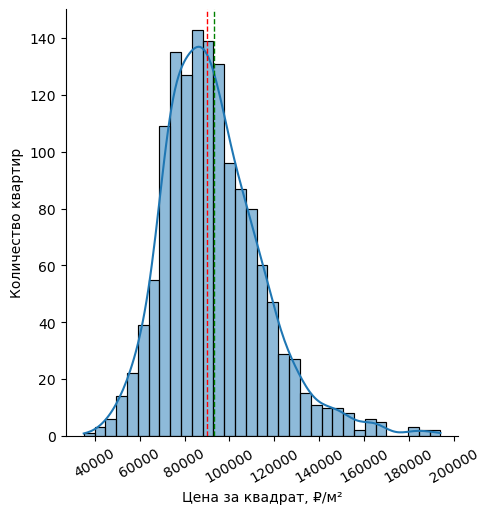

In [371]:
ax = sns.displot(price_beyond_square, kde=True)
ax.set(ylabel="Количество квартир")
plt.setp(plt.xticks()[1],rotation=30)
plt.axvline(x=price_beyond_square.median(),
            color='red',
            ls='--', 
            lw=1)
plt.axvline(x=price_beyond_square.mean(),
            color='green',
            ls='--', 
            lw=1)

[Text(0.5, 0, 'Цена за квадрат, ₽/м²')]

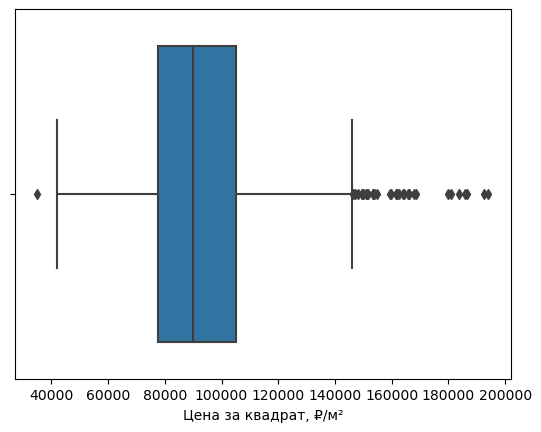

In [372]:
ax = sns.boxplot(x=price_beyond_square)
ax.set(xlabel="Цена за квадрат, ₽/м²")

In [373]:
price_beyond_square.describe()

count      1424.000000
mean      92947.429775
std       22088.279005
min       35088.000000
25%       77500.000000
50%       90000.000000
75%      104940.500000
max      194055.000000
Name: Цена за квадрат, ₽/м², dtype: float64

In [374]:
# Посчитаем процент выбросов
quantity_and_percentage_outliers(price_beyond_square)

Выбросы: 38 или 3%.


- Средняя цена за квадрат 3-х комнатных квартир составляет около 92947 ₽/м², а медиана около 90000 ₽/м². 
- У 38 квартир или 3%, цена за квадрат значительно отличается от цены за квадрат остальных квартир.

## 8. Изучить взаимосвязь цены и остальных количественных переменных.

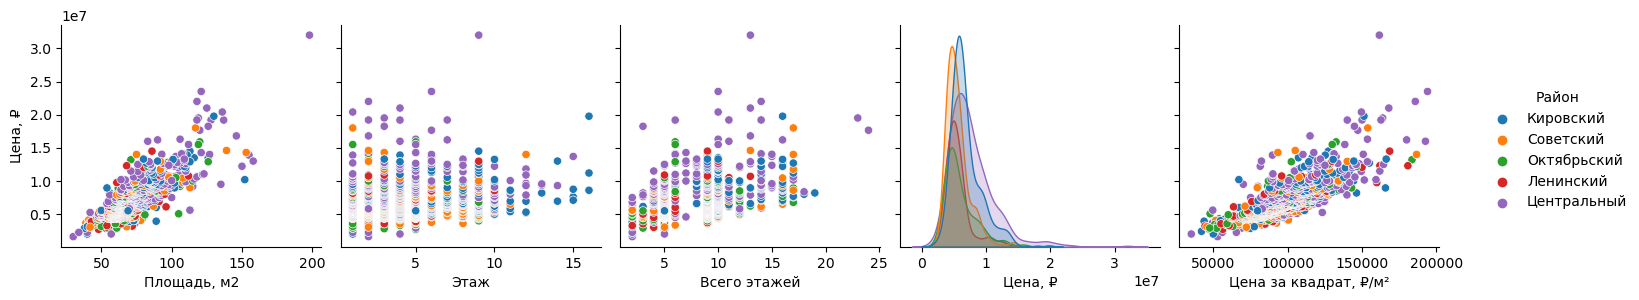

In [375]:
sns.pairplot(df, hue="Район", kind="scatter", y_vars="Цена, ₽", height=3)

Как мы можем заметить чем больше площадь и цена за квадрат, тем выше цена.

Изучим подробнее отношение цены и остальных количественных переменных. Для этого произведем логарифмирование наших количественных переменных, это позволит выровнять масштаб данных, улучшить линейность отношений, стабилизировать экстремальные значения переменных. Также проверим распределения на нормальность и выберем какой коэффицент корреляции использовать.

In [376]:
# Логарифмируем переменные
df_log = df[['Площадь, м2', 'Этаж', 'Всего этажей', 'Цена, ₽', 'Цена за квадрат, ₽/м²']].apply(np.log)
df_log.head()

,"Площадь, м2",Этаж,Всего этажей,"Цена, ₽","Цена за квадрат, ₽/м²"
0,4.189655,1.945910,2.302585,15.687313,11.485606
1,4.262680,0.000000,2.302585,15.856731,11.592642
2,4.110874,0.000000,2.197225,15.588767,11.477889
3,4.127134,2.197225,2.197225,15.318476,11.189727
4,4.330733,1.098612,2.302585,16.326036,11.995302


In [377]:
# Для проверки на нормальность используем тест Шапиро–Уилка.
def test_shapiro_wilk(df: pd.DataFrame, probability_level: float=0.05) -> None:
    columns = df.columns
    total_res = []
    for column in columns:
        shapiro_test = stats.shapiro(df[column])
        if shapiro_test[1] > probability_level:
            res = f"- True, {df[column].name}: p>{probability_level}, нулевая гипотеза о нормальности распределения не отвергается"
            total_res.append(res)
        else:
            res = f"- False, {df[column].name}: p<{probability_level}, нулевая гипотеза о нормальности распределения отвергается, принимается альтернативная гипотеза о том, что данные не имеют нормальное распределение"
            total_res.append(res)
    for res in total_res:
        print(res)

test_shapiro_wilk(df_log)

- False, Площадь, м2: p<0.05, нулевая гипотеза о нормальности распределения отвергается, принимается альтернативная гипотеза о том, что данные не имеют нормальное распределение
- False, Этаж: p<0.05, нулевая гипотеза о нормальности распределения отвергается, принимается альтернативная гипотеза о том, что данные не имеют нормальное распределение
- False, Всего этажей: p<0.05, нулевая гипотеза о нормальности распределения отвергается, принимается альтернативная гипотеза о том, что данные не имеют нормальное распределение
- False, Цена, ₽: p<0.05, нулевая гипотеза о нормальности распределения отвергается, принимается альтернативная гипотеза о том, что данные не имеют нормальное распределение
- False, Цена за квадрат, ₽/м²: p<0.05, нулевая гипотеза о нормальности распределения отвергается, принимается альтернативная гипотеза о том, что данные не имеют нормальное распределение


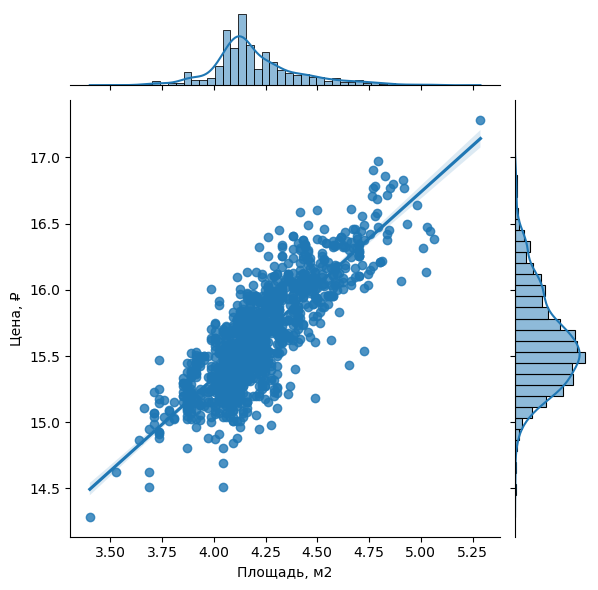

In [378]:
sns.jointplot(data=df_log, y="Цена, ₽", x="Площадь, м2", kind="reg")

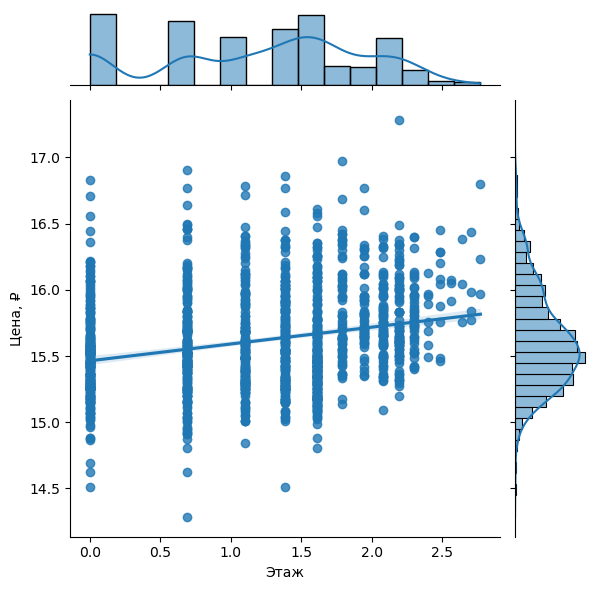

In [379]:
sns.jointplot(data=df_log, y="Цена, ₽", x="Этаж", kind="reg")

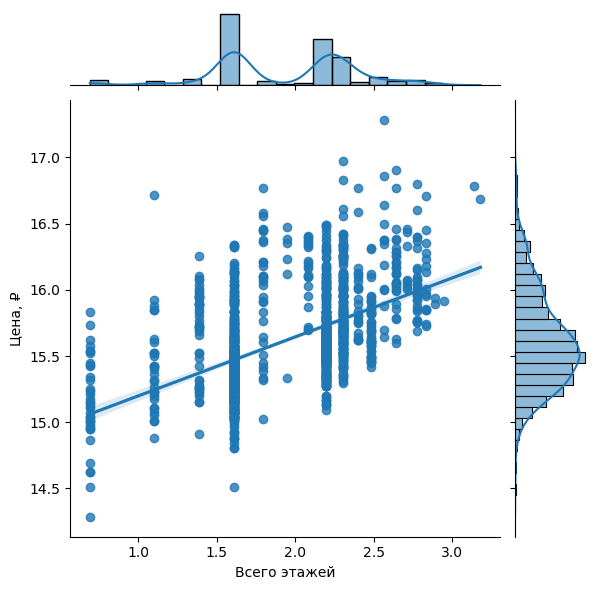

In [380]:
sns.jointplot(data=df_log, y="Цена, ₽", x="Всего этажей", kind="reg")

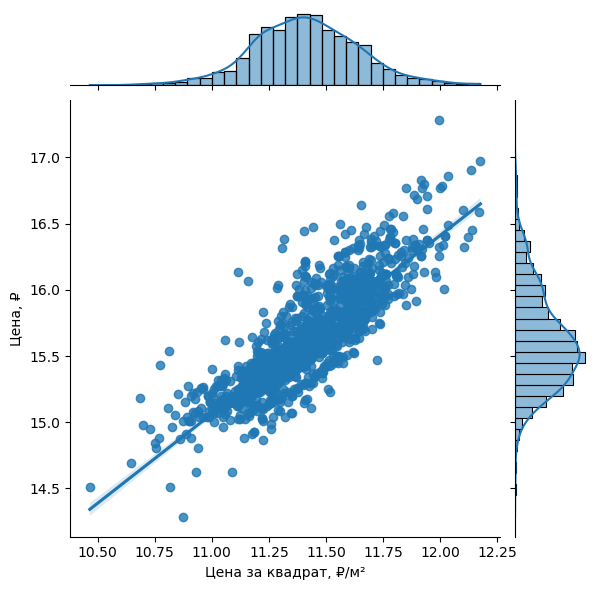

In [381]:
sns.jointplot(data=df_log, y="Цена, ₽", x="Цена за квадрат, ₽/м²", kind="reg")

In [383]:
# Данные не соответствуют предположениям о нормальном распределении, поэтому воспользуемся коэффициентом корреляции Спирмена.
df_log_corr_spearman = df_log.corr(method="spearman")
df_log_corr_spearman

,"Площадь, м2",Этаж,Всего этажей,"Цена, ₽","Цена за квадрат, ₽/м²"
"Площадь, м2",1.000000,0.191414,0.429160,0.775281,0.403644
Этаж,0.191414,1.000000,0.428034,0.269937,0.247010
Всего этажей,0.429160,0.428034,1.000000,0.566733,0.499858
"Цена, ₽",0.775281,0.269937,0.566733,1.000000,0.859734
"Цена за квадрат, ₽/м²",0.403644,0.247010,0.499858,0.859734,1.000000


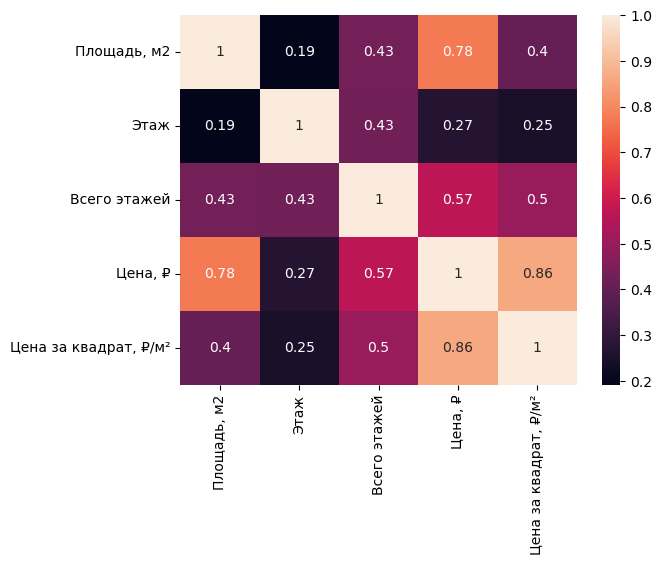

In [385]:
ax = sns.heatmap(df_log_corr_spearman, annot=True)

- Вывод:
    - Цена, ₽ - Площадь, м2 - cуществует сильная, прямая линейная связь между  признаками, коэффициент корреляции 0.78
    - Цена, ₽ - Этаж - cуществует слабая, прямая линейная связь между  признаками, коэффициент корреляции 0.27
    - Цена, ₽ - Всего этажей - cуществует средняя, прямая линейная связь между  признаками, коэффициент корреляции 0.57
    - Цена, ₽ - Цена за квадрат, ₽/м² - cуществует сильная, прямая линейная связь между  признаками, коэффициент корреляции 0.86

## Заключение

1. Узнать, топ 10 агенств по продаже квартир. Какое агенство продает больше всего квартир?
    - Топ 10 агенств:
        1. Этажи Омск - 114 квартир
        2. Самолет Плюс Омск-Центр - 80 квартир
        3. АВЕСТА-РИЭЛТ - 50 квартир
        4. Квартсервис - 48 квартир
        5. МИАРД ВЛАДИС - 37 квартир
        6. РИЭЛТКОНСАЛТ - 35 квартир
        7. ЛИОРА - 30 квартир
        8. АССОЛЬ - 20 квартир
        9. ТандемТ - 17 квартир
        10. НСБ-Недвижимость - 15 квартир
    - Агенство Этажи продает больше всего 3-х комнатных квартир, в городе Омск.
2. Сколько в каждом районе продается квартир?
    - Центральный район - 420 квартир
    - Кировский район - 357 квартир
    - Советский район - 292 квартир
    - Ленинский район - 178 квартир
    - Октябрьский район - 177 квартир
3. Какая средняя площадь квартир и медиана. Какой процент выбросов?
    - Средняя площадь 3-х комнатных квартир составляет 68.5 м2, а медиана 63 м2. 
    - У 113 квартир или 8%, площадь значительно отличается от площади остальных квартир.
4. На каких этажах продаются квартиры? Укажи 5 самых популярных этажей и количество квартир?
    - Квартиры продаются с 1 по 16 этаж.
    - Согласно данным, больше всего 3-х комнатных квартир продается на первых 5 этажах.
    - Количество квартир:
        - 1 этаж - 245 квартир
        - 2 этаж - 218 квартир 
        - 3 этаж - 166 квартир
        - 4 этаж - 191 квартира
        - 5 этаж - 241 квартира
5. Узнать, топ 5 домов по этажности, в которых больше всего продается квартир? Какая самая большая этажность дома?
    - Больше всего квартир продается:
        1. 5 этажный дом - 532 квартиры
        2. 9 этажный дом - 344 квартиры
        3. 10 этажный дом - 206 квартир
        4. 12 этажный дом - 48 квартир
        5. 4 этажный дом - 45 квартир
    - Самая большая этажность дома - 24 этажа.
6. Какая средняя цена и медиана цен? Какой процент выбросов?
    - Средняя цена 3-х комнатных квартир составляет около 6.5 млн. руб., а медиана около 5.8 млн. руб. 
    - У 85 квартир или 6%, цена значительно отличается от цены остальных квартир.
7. Какая средняя цена и медиана цен за квадрат? Какой процент выбросов?
    - Средняя цена за квадрат 3-х комнатных квартир составляет около 92947 ₽/м², а медиана около 90000 ₽/м². 
    - У 38 квартир или 3%, цена за квадрат значительно отличается от цены за квадрат остальных квартир.
8. Изучить взаимосвязь цены и остальных количественных переменных. 
    - Цена, ₽ - Площадь, м2 - cуществует сильная, прямая линейная связь между  признаками, коэффициент корреляции 0.78
    - Цена, ₽ - Этаж - cуществует слабая, прямая линейная связь между  признаками, коэффициент корреляции 0.27
    - Цена, ₽ - Всего этажей - cуществует средняя, прямая линейная связь между  признаками, коэффициент корреляции 0.57
    - Цена, ₽ - Цена за квадрат, ₽/м² - cуществует сильная, прямая линейная связь между  признаками, коэффициент корреляции 0.86